# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import pustaka dasar
import numpy as np
import pandas as pd

# Import pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import pustaka untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import pustaka untuk model machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Import pustaka untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv("fixdataset.csv")
df.head()

,Unnamed: 0,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0,14.09,1.0,36.0,0.0,70.0,0.0,81.0,1.0,5112.21,1
1,1,376.24,1.0,15.0,0.0,68.0,0.0,141.0,1.0,13758.91,2
2,2,126.29,1.0,23.0,2.0,19.0,3.0,56.0,1.0,1122.35,0
3,3,184.50,1.0,33.0,2.0,26.0,3.0,25.0,1.0,8569.06,1
4,4,13.45,0.0,1.0,2.0,26.0,3.0,198.0,1.0,7429.40,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Fitur
y = df['Cluster']  # Target (label hasil clustering)

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah sampel pada setiap set
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 1919
Jumlah data uji: 480


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan akurasi awal model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

Akurasi Model: 0.9979


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9979
Precision: 0.9979
Recall: 0.9979
F1-Score: 0.9979


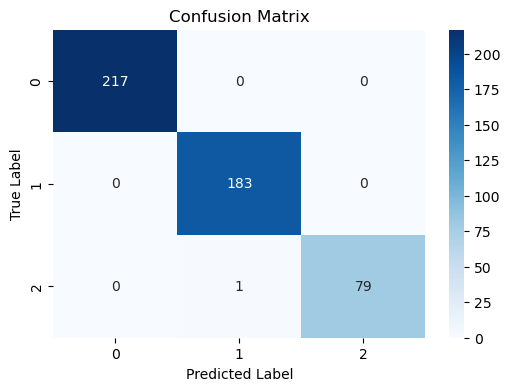

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [9]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9979


In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.99739583 1.         1.         1.         0.99738903]
Mean CV Score: 0.9990


1. Algoritma yang Digunakan
Model klasifikasi dibangun menggunakan algoritma Random Forest. Model ini diuji dengan dataset hasil clustering untuk mengklasifikasikan data ke dalam kelompok yang telah ditentukan.

2. Hasil Evaluasi Model

a. Evaluasi di Data Uji
Metrik      Nilai
Accuracy	0.9979
Precision	0.9979
Recall      0.9979
F1-Score	0.9979
Hasil ini menunjukkan bahwa model memiliki performa yang sangat baik dengan akurasi hampir sempurna.

b. Cross-Validation
Untuk menguji stabilitas model, dilakukan validasi silang (k-fold cross-validation) dengan hasil sebagai berikut:
Cross-Validation Scores: [0.9974, 1.0000, 1.0000, 1.0000, 0.9974]
Mean CV Score: 0.9990
Skor validasi silang yang sangat tinggi menunjukkan bahwa model memiliki generalisasi yang baik dan tidak hanya unggul pada dataset latih.

c. Confusion Matrix
Confusion matrix menunjukkan bahwa model hampir tidak melakukan kesalahan klasifikasi.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

- Dari hasil evaluasi model, beberapa aspek yang perlu diperhatikan:

Precision dan Recall sangat tinggi dan hampir sama untuk semua kelas, yang menunjukkan bahwa model tidak mengalami ketidakseimbangan dalam klasifikasi.

Cross-validation score sangat tinggi (0.9990), yang mengindikasikan bahwa model tetap kuat di berbagai subset data.

- Potensi overfitting:

Akurasi di data uji dan validasi silang sangat tinggi, yang bisa menjadi indikasi bahwa model terlalu "menghafal" pola dalam dataset daripada mampu menggeneralisasi ke data baru.

Jika dataset yang digunakan memiliki fitur yang terlalu dominan atau data leakage, model mungkin terlihat sempurna tetapi kurang efektif pada data baru.



**Rekomendasi Tindakan Lanjutan**

Evaluasi dengan Data Baru

Gunakan dataset baru atau tambahan yang tidak pernah dilihat model sebelumnya untuk menguji generalisasi model di dunia nyata. Jika akurasi turun signifikan, bisa jadi model mengalami overfitting.